<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/2.%20Machine%20Learning/Semana%204%20-%20Boosting/Semana_4_Ejercicio_de_practica_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

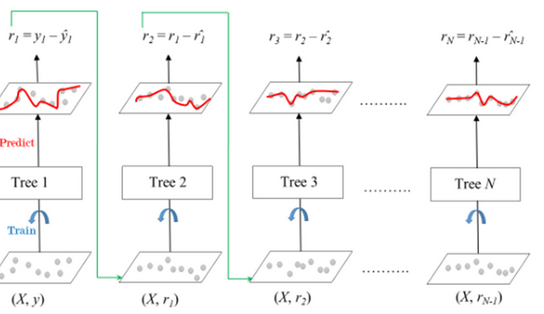

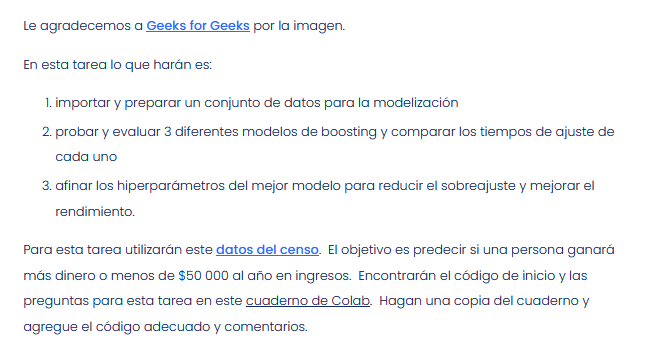

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [25]:
df["income-class"].value_counts()

<=50K    24720
>50K      7841
Name: income-class, dtype: int64

In [71]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/census_income - census_income.csv")
df.head()

,Unnamed: 0,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [68]:
df.drop(columns="Unnamed: 0", inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  income-class    32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [73]:
X = df.drop(columns="income-class")
df["income-class"] = df["income-class"].apply(lambda x: 1 if x == '>50K' else 0)

y = df["income-class"]

In [74]:
df["income-class"].value_counts()

0    24720
1     7841
Name: income-class, dtype: int64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=42)

In [76]:
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown="ignore")

In [77]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")

In [78]:
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [79]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder="passthrough")
col_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e87e05e80>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6e87c97e50>)])

In [80]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [81]:
X_train_processed.shape

(24420, 107)

##**GBC**

In [82]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_processed, y_train)
print("Training accuracy:", gbc.score(X_train_processed, y_train))
print("Testing accuracy:", gbc.score(X_test_processed, y_test))
gbc_predicts = gbc.predict(X_test_processed)

Training accuracy: 0.8678951678951679
Testing accuracy: 0.8675838349097162


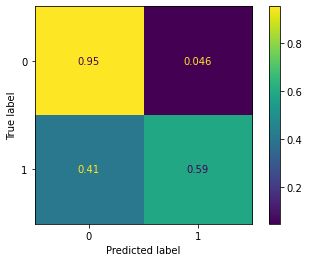

In [83]:
cm_gbc = confusion_matrix(y_test,gbc_predicts,labels=gbc.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc, display_labels=gbc.classes_)
disp.plot()

##**LGBM**

In [84]:
lgbm = LGBMClassifier()
lgbm.fit(X_train_processed, y_train)
print('Training accuracy:', lgbm.score(X_train_processed, y_train))
print('Testing accuracy:', lgbm.score(X_test_processed, y_test))
lgbm_predicts = lgbm.predict(X_test_processed)

Training accuracy: 0.8878787878787879
Testing accuracy: 0.8769192973836138


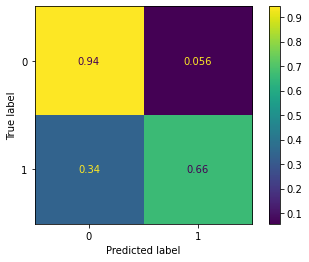

In [85]:
cm_lgbm = confusion_matrix(y_test,lgbm_predicts,labels=lgbm.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm, display_labels=lgbm.classes_)
disp.plot()

##**XGBoost**

In [86]:
xgb = XGBClassifier()
xgb.fit(X_train_processed, y_train)
print('Training accuracy:', xgb.score(X_train_processed, y_train))
print('Testing accuracy:', xgb.score(X_test_processed, y_test))
xgb_predicts = xgb.predict(X_test_processed)

Training accuracy: 0.9037264537264538
Testing accuracy: 0.8727429062768701


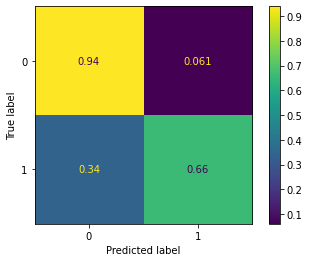

In [87]:
cm_xgb = confusion_matrix(y_test,xgb_predicts,labels=xgb.classes_, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp.plot()